rotated_points_list [array([10., 10.]), array([29.69615506, 13.47296355]), array([ 6.52703645, 29.69615506]), array([26.22319151, 33.16911861])]
rotated_points_vector [[10.         29.69615506  6.52703645 26.22319151 10.         13.47296355
  29.69615506 33.16911861]]
compute_proposed_matrix-real points [ 0.          0.30384494  3.47296355  3.77680849  0.         -3.47296355
  0.30384494 -3.16911861]
best_OLS [-1.88840425  1.58455931]
best_OLS_angle [-1.88840425  1.58455931  0.00759612]
best_estimate_angle [ 8.11159575  8.26351676 28.11101875 28.26293975 11.58455931 31.5839823
 11.4326383  31.43206129]


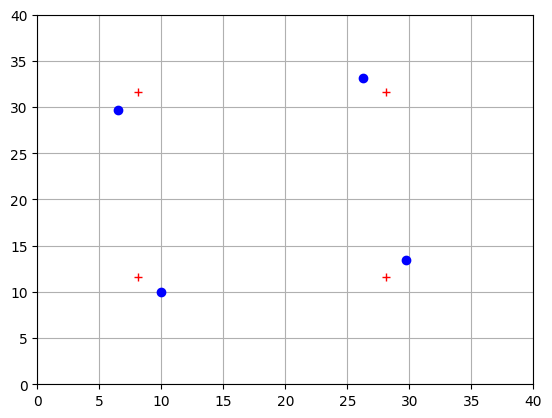

In [1]:
## Test on a 2x2 matrix, size of the image : 60x60
import numpy as np
import matplotlib.pyplot as plt

real_points = np.array([[(10,10),(30,10)],
               [(10,30),(30,30)]])

points = np.array([[10,10],[30,10],[10,30],[30,30]])

real_points_vector = np.array([10,30,10,30,10,10,30,30])
real_points_vector = real_points_vector +0 + np.random.random((1,8))[0]
#print('real_points_vector',real_points_vector)
d = 20 # distance between points, known

def rotation_matrix(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],
                     [np.sin(theta),np.cos(theta)]])

theta = 10*np.pi/180
R_theta = rotation_matrix(theta)
rotated_points_list = []

for point in points:
    rotated_point = np.array([10,10]) + R_theta@(point- np.array([10,10]))
    rotated_points_list.append(rotated_point)
print('rotated_points_list',rotated_points_list)
rotated_points_vector = np.zeros((1,8))

for i in range (0,4):
    rotated_points_vector[0][i] = rotated_points_list[i][0]
    rotated_points_vector[0][4+i] = rotated_points_list[i][1]
print('rotated_points_vector',rotated_points_vector)

real_points_vector = rotated_points_vector[0]
def compute_proposed_matrix(x0,y0):
    x11 = x0 +d/2 + d*0
    x12 = x0 +d/2 + d*1
    y11 = y0 +d/2 + d*0
    y12 = y0 + d / 2 + d * 0
    x21 = x0 +d/2 + d*0
    x22 = x0 + d / 2 + d * 1
    y21 = y0 +d/2 + d*1
    y22 = y0 + d / 2 + d * 1
    return  np.array([x11,x12,x21,x22,y11,y12,y21,y22])

def compute_delta_y(y):
    y_tilde = y -d/2
    y_tilde[0] -= d*0
    y_tilde[1] -= d*1
    y_tilde[2] -= d * 0
    y_tilde[3] -= d * 1
    y_tilde[4] -= d*0
    y_tilde[5] -= d * 0
    y_tilde[6] -= d*1
    y_tilde[7] -= d * 1
    return y_tilde

y_tilde = compute_delta_y(real_points_vector)

X = np.array([[1,0],
              [1,0],
              [1,0],
              [1,0],
              [0,1],
              [0,1],
              [0,1],
              [0,1]])

print('compute_proposed_matrix-real points',compute_proposed_matrix(0,0)-real_points_vector)

best_OLS = np.linalg.inv(X.T @ X)@X.T@y_tilde
print('best_OLS',best_OLS)

N = len(real_points_vector)
#print(real_points_vector[0:N//2])
plt.plot(real_points_vector[0:N//2],real_points_vector[N//2:],'bo')
best_estimate = compute_proposed_matrix(best_OLS[0],best_OLS[1])
plt.plot(best_estimate[0:N//2],best_estimate[N//2:],'r+')
plt.grid()
plt.axis([0,40,0,40])

def compute_proposed_matrix_angle(x0,y0,theta):
    x11 = x0 +d/2 + d*0*np.cos(theta) + d*0*np.sin(theta)
    x21 = x0 +d/2 + d*1*np.cos(theta) + d*0*np.sin(theta)
    y11 = y0 +d/2 + d*0*np.cos(theta) - d*0*np.sin(theta)
    y12 = y0 + d / 2 + d * 1*np.cos(theta) - d*0*np.sin(theta)
    x12 = x0 +d/2 + d*0 * np.cos(theta) + d*1*np.sin(theta)
    x22 = x0 + d / 2 + d * 1 * np.cos(theta) + d*1*np.sin(theta)
    y21 = y0 +d/2 + d*0 * np.cos(theta) - d*1*np.sin(theta)
    y22 = y0 + d / 2 + d * 1 * np.cos(theta) - d*1*np.sin(theta)
    return  np.array([x11,x12,x21,x22,y11,y12,y21,y22])

X_angle = np.array([[1,0,(1-1)*d], #x11
              [1,0,-(2-1)*d], #x12
              [1,0,-(1-2)*d], #x21
              [1,0,(2-2)*d], #x22
              [0,1,(1-1)*d],
              [0,1,-(1-2)*d],
              [0,1,-(2-1)*d],
              [0,1,(2-2)*d]])

best_OLS_angle = np.linalg.inv(X_angle.T @ X_angle)@X_angle.T@y_tilde

print('best_OLS_angle',best_OLS_angle)
best_estimate_angle = compute_proposed_matrix_angle(best_OLS_angle[0],best_OLS_angle[1],best_OLS_angle[2])
print('best_estimate_angle',best_estimate_angle)
#plt.plot(best_estimate_angle[0:N//2],best_estimate_angle[N//2:],'g+')
plt.show()
